## Overview: 
Here I explore the UCI Default of Credit Cards data set (available on Kaggle:https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset  ) and compare several machine learning models (with/without feature engineering) for predicting default.

This notebook proceeds as follows:
1. Read and Explore the Data
    1. Look at NaNs
    1. ll 
1. Prepare the Data
    1. Cleaning the Data
    1. Feature Engineering
        1. Indicator variables
        1. Feature interactions

Introduction
This notebook was created to learn basic techniques of data manipulation and machine learning. The idea is to use the dataset UCI_Credit_Card to improve basic skills of data cleaning, data analysis, data visualization and machine learning. It is primarily intended to help myself understanding what to do and how. Any feedback is welcome.

Variables
There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data_path = os.path.join(dirname, filename)

# Any results you write to the current directory are saved as output.

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


In [96]:
df_o = pd.read_csv(data_path, nrows =5000)
#df_o.describe()
df_o.head(10)
#df.columns
#df_o.info

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0,0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272,3455,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331,14948,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314,28959,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940,19146,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394,19619,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653,483003,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221,-159,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211,11793,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [97]:
# Check for NAs
df = df_o.dropna(axis = 0, how ='any') 

print("Old data frame length:", len(df_o), "\nNew data frame length:",  
       len(df), "\nNumber of rows with at least 1 NA value: ", 
       (len(df_o)-len(df))) 

# Set the ID column as the index
df.set_index('ID',inplace=True)


Old data frame length: 5000 
New data frame length: 5000 
Number of rows with at least 1 NA value:  0


In [98]:
df.rename(columns = {"default.payment.next.month":"default_next"},inplace=True)
df.rename(str.lower, axis='columns',inplace=True)
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_next'],
      dtype='object')

## Data Associations

We'll start with a heatmap of all the correlations between features. 

Text(0.5, 1.0, 'Correlation for all Features')

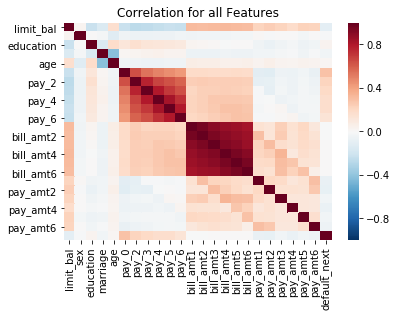

In [99]:
import seaborn as sn

corr = df.corr()
#cmap = sn.diverging_palette(255, 133, l=60, n=7, center="dark")
ax = sn.heatmap(corr,cmap='RdBu_r',vmin=-1,vmax=1)

ax.set_title("Correlation for all Features")

There are some interesting trends that emerge here. The PAY, BILL, and PAY AMNT   features each form correlation clusters with themselves (these are the 6x6 squares that are present). 

The BILL attributes are the most highly correlated with each other. We could perhaps reduce these down to one variable and perhaps engineer a few more interesting features. 

The PAY featurs, which you'll recall are represneted on a -2 to 6 scale (with higher (positive) values indicative of a longer duration of missed payments) are also correlated each other, though decreasingly so for the older features in the group.   

It's also worth noting that the PAY features are the feature with the highest correlation with defaulting on the credit card (our target variable "default_next")--though its modest ~0.35 or so. Yet PAY_AMT and BILL_AMT are even less correlated with default. The demographic info (age, education, etc) are also poorly corrlation with our target variable.   

In [100]:
df.loc[:,["pay_0","pay_2","pay_3","pay_4","pay_5","pay_6","default_next"]].describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_next
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005000,-0.148400,-0.159400,-0.245200,-0.261000,-0.289200,0.221400
std,1.131208,1.204603,1.220283,1.143389,1.132932,1.157338,0.415231
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,1.000000


In [101]:
%matplotlib inline
from pandas.plotting import scatter_matrix
attributes_pay = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','default_next']
#scatter_matrix(df[attributes_pay],figsize=(10,7.5))

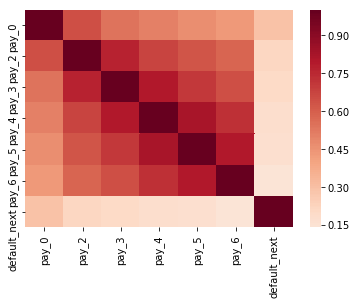

In [102]:
#attributes_pay = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
corr = df[attributes_pay].corr()
_=sn.heatmap(corr, cmap='RdBu_r',center=0)


In [103]:
attributes_bil = ['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5',
                  'bill_amt6','default_next']
#scatter_matrix(df[attributes_bil],figsize=(15,11))

Looking at the top row, it's not surprising to see that BILL_AMT1 is most correlated with BILL_AMT2 and progressively less with bills amount for previous montion. 

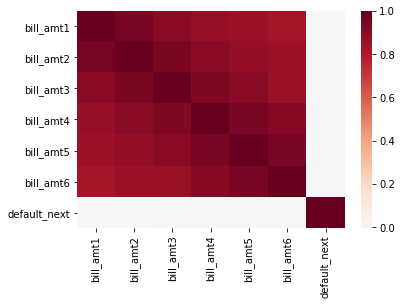

In [104]:
corr = df[attributes_bil].corr()
_=sn.heatmap(corr, cmap='RdBu_r',center=0)

In [105]:
attributes_payamt = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5',
                     'pay_amt6','default_next']
#scatter_matrix(df[attributes],figsize=(15,11))

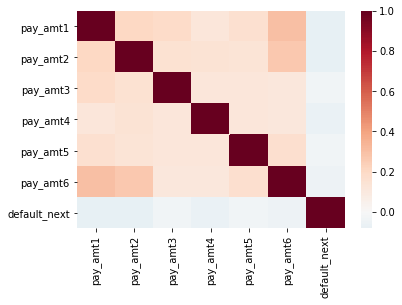

In [106]:
corr = df[attributes_payamt].corr()
_=sn.heatmap(corr, cmap='RdBu_r',center=0)


Prepare the data for machine learning.

In [107]:
y=df.default_next

In [108]:
#y.describe()
y.value_counts()
#y.head(10)

0    3893
1    1107
Name: default_next, dtype: int64

In [109]:
df.columns
x=df.copy()
x.drop(['default_next'],axis=1,inplace=True)
x.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object')

### Baseline models

Here I'm giong to employ two common classifiers to get an idea of baseline predictive performance prior to any feature engineering or tuning. 

First up: Logistic Regression

In [110]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [112]:


auc = roc_auc_score(y_val, y_predict_lr)
print('AUC (lin-reg,plain)=',round(auc,5))
recall = recall_score(y_val, y_predict_lr)
print('Recall(lin-reg,plain)',round(recall,5))

AUC (lin-reg,plain)= 0.50153
Recall(lin-reg,plain) 0.00437


Confusion matrix, without normalization


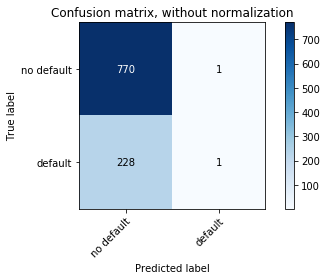

In [113]:
cm = confusion_matrix(y_val, y_predict_lr)
plot_confusion_matrix(y_val, y_predict_lr, classes=['no default','default'],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

In [114]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=8,random_state=3)
dt_model.fit(x_train,y_train)

y_predict_dt = dt_model.predict(x_val)

In [115]:
auc = roc_auc_score(y_val, y_predict_dt)
print('AUC (lin-reg,plain)=',round(auc,5))
recall = recall_score(y_val, y_predict_dt)
print('Recall(lin-reg,plain)',round(recall,5))
print(accuracy_score(y_val, y_predict_dt))

AUC (lin-reg,plain)= 0.64078
Recall(lin-reg,plain) 0.35808
0.794


Confusion matrix, without normalization


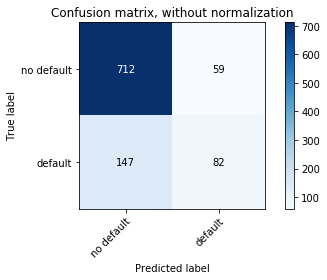

In [116]:
cm = confusion_matrix(y_val, y_predict_dt)
plot_confusion_matrix(y_val, y_predict_dt, classes=['no default','default'],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

In [117]:

model = LogisticRegression(random_state=0,solver='lbfgs', multi_class='ovr')
model_lr_sc = Pipeline(steps = [('scaler',StandardScaler()),('model',model)])
model_lr_sc.fit(x_train,y_train)
y_predict_lr_sc = model_lr_sc.predict(x_val)

In [118]:
auc = roc_auc_score(y_val, y_predict_lr_sc)
print('AUC (lin-reg,plain)=',round(auc,5))
recall = recall_score(y_val, y_predict_lr_sc)
print('Recall(lin-reg,plain)',round(recall,5))
print(accuracy_score(y_val, y_predict_lr_sc))

AUC (lin-reg,plain)= 0.56321
Recall(lin-reg,plain) 0.14847
0.788


Confusion matrix, without normalization


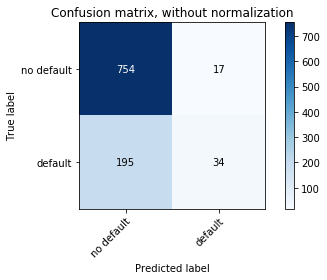

In [119]:
cm = confusion_matrix(y_val, y_predict_lr_sc)
plot_confusion_matrix(y_val, y_predict_lr_sc, classes=['no default','default'],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

In [120]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

model = LogisticRegression(random_state=0,solver='lbfgs', multi_class='ovr')
model_lr_sc_res = Pipeline(steps = [('scaler',StandardScaler()),('model',model)])
model_lr_sc_res.fit(x_train_res,y_train_res)
y_predict_lr_sc_res = model_lr_sc_res.predict(x_val)

In [121]:
auc = roc_auc_score(y_val, y_predict_lr_sc_res)
print('AUC (lin-reg,plain)=',round(auc,5))
recall = recall_score(y_val, y_predict_lr_sc_res)
print('Recall(lin-reg,plain)',round(recall,5))
print(accuracy_score(y_val, y_predict_lr_sc_res))

AUC (lin-reg,plain)= 0.66389
Recall(lin-reg,plain) 0.61572
0.69


Confusion matrix, without normalization


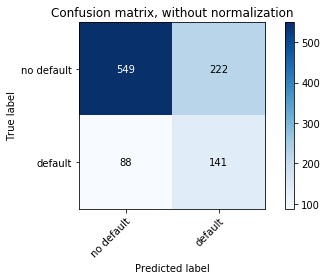

In [122]:
cm = confusion_matrix(y_val, y_predict_lr_sc_res)
plot_confusion_matrix(y_val, y_predict_lr_sc_res, classes=['no default','default'],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

## Feature Engineering

First lets explore bill amount. Rather than just looking at bill *amount*, lets add bill ratio, for the current and previous bills: BILL_1to2 = BILL_AMT1 / BILL_AMT2. A large increase in bill amount from one month to the next might correlate with default.  Similarly, pay amount might reaveal a similar trend: PAY_1to2 = PAY_AMT1 /PAY_AMT2. Another choice might be BILL_AMT1/PAY_AMT1. A higher bill-to-payment ratio seem likely to we a warning sign of default

The Diffs and the Ratios capture somewhat overlapping trends. Diff maintains scaling which may be useful considering higher borrowing levels may be indicative of default. But the ratios which are be definition normalized, may be better for their simplicity. 


In [123]:
# The Diffs and the Ratios capture somewhat overlapping trends. Diff maining scaling, 
# Which may 

# One Month Ratios
F1 = df["BILL_AMT1"]/df["BILL_AMT2"]
F2 = df["PAY_AMT2"]/df["PAY_AMT1"]

# Four Month Rations
F3 = df["BILL_AMT1"]/df["BILL_AMT5"]
F4 = df["PAY_AMT5"]/df["PAY_AMT1"]

# One Month Diffs
F5 = df["BILL_AMT1"]-df["BILL_AMT2"]
F6 = df["PAY_AMT2"]-df["PAY_AMT1"]

# Four Month Diffs
F7 = df["BILL_AMT1"]-df["BILL_AMT5"]
F8 = df["PAY_AMT5"]-df["PAY_AMT1"]

F9 = df["BILL_AMT1"]/df["PAY_AMT1"]
F10 = df["BILL_AMT1"] -df["PAY_AMT1"]

new_cols = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10']
df['F1'] = F1
df['F2'] = F2
df['F3'] = F3
df['F4'] = F4
df['F5'] = F5
df['F6'] = F6
df['F7'] = F7
df['F8'] = F8
df['F9'] = F9
df['F10'] = F10
#df[new_col] =[F1,F1,F3,F4,F5,F6,F7,F8,F9,F10]

KeyError: 'BILL_AMT1'

In [ ]:
df.head()

In [ ]:
df.SEX=df['SEX'].astype('category')

In [ ]:
#from matplotlib import pyplot as plt
#sn.set(rc={'figure.figsize':(6,13)})
figs,ax = plt.subplots(1,2,figsize=(10,5),clear=True)
#sn.scatterplot(ax=ax[0],x=df['SEX'], y=df['AGE'], hue=df['default_next'])
#ax0 = ax[0,0]
#_=sn.catplot(ax=ax[0],x=df['SEX'], y=df['AGE'], hue=df['default_next'], kind="swarm", data=df)
#_=sn.catplot(ax=ax[1],x=df['SEX'], y=df['AGE'], hue=df['default_next'], kind="box", data=df)
_=sn.catplot(ax=ax[0],x='SEX', y='AGE', hue='default_next', kind="swarm", data=df)
_=sn.catplot(ax=ax[1],x='SEX', y='AGE', hue='default_next', kind="box", data=df)


In [ ]:
figs,ax = plt.subplots(1,2,figsize=(10,5),clear=True)
#sn.scatterplot(ax=ax[0],x=df['SEX'], y=df['AGE'], hue=df['default_next'])
#ax0 = ax[0,0]
_=sn.catplot(ax=ax[0],x=df['SEX'], y=df['AGE'], hue=df['default_next'], kind="swarm", data=df)
_=sn.catplot(ax=ax[1],x=df['SEX'], y=df['AGE'], hue=df['default_next'], kind="box", data=df)


In [ ]:
#sn.set(rc={'figure.figsize':(6,13)})
#sn.scatterplot(x=df['SEX'], y=df['AGE'], hue=df['default_next'])
#sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

In [ ]:
corr = df.corr()
#cmap = sn.diverging_palette(255, 133, l=60, n=7, center="dark")
ax = sn.heatmap(corr,cmap='RdBu_r',vmin=-1,vmax=1)

ax.set_title("Correlation for all Features")

In [ ]:
df.[BILL_AMT1]/df.[BILL_AMT2]

Ideas for indicator variables and combined feature vairiables:
1. Male and under 25